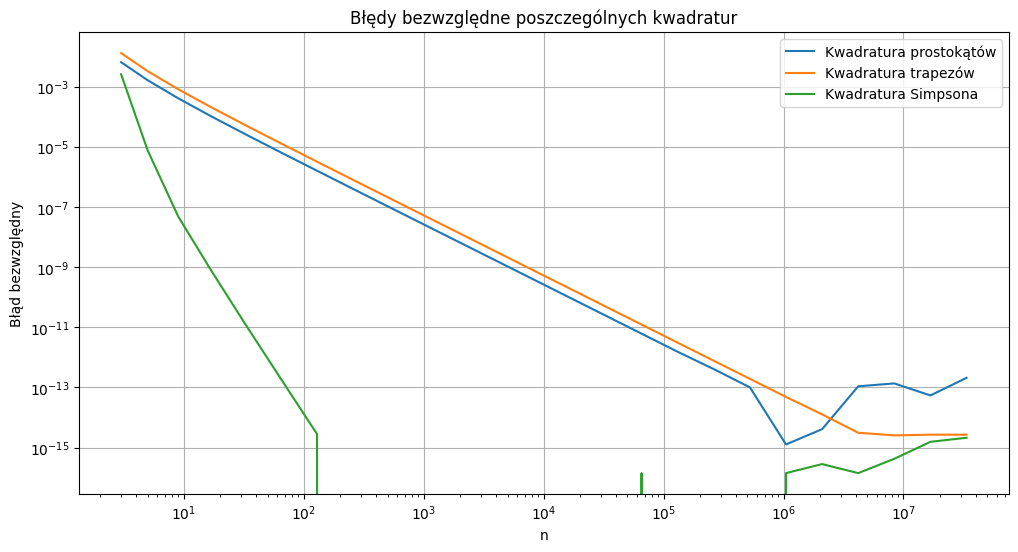

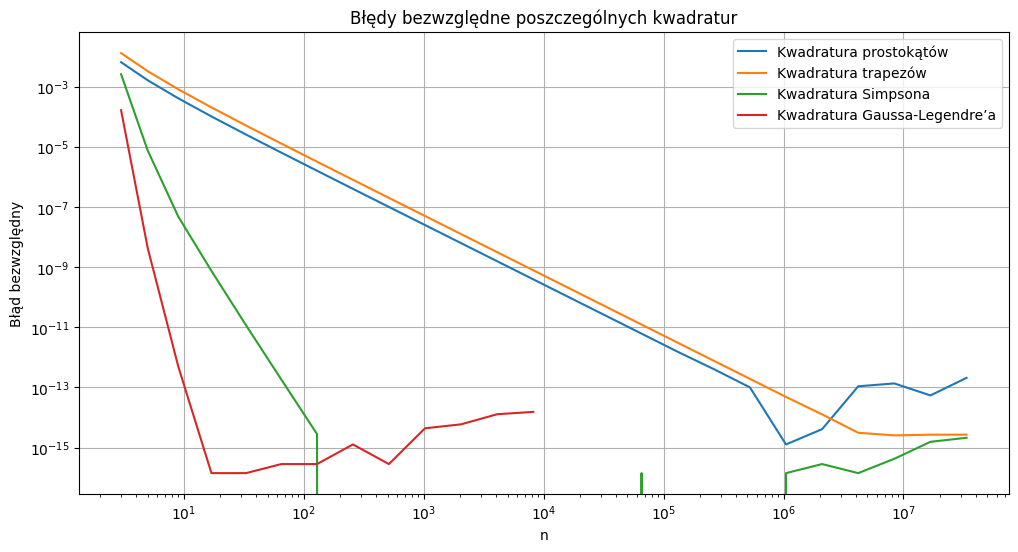

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import trapezoid, simpson
import sys


def f(x):
    return 4 / (1 + x ** 2)


eps = sys.float_info.epsilon
real_integral_val = np.pi
a = 0
b = 1
width = b - a


def rect_integral(xs):
    s = 0
    for i in range(len(xs) - 1):
        dx = xs[i + 1] - xs[i]
        x = (xs[i] + xs[i + 1]) / 2
        s += f(x) * dx
    return s


def trap_integral(xs):
    return trapezoid(f(xs), xs)


def simps_integral(xs):
    return simpson(f(xs), xs)


m_vec = np.arange(1, 26)
n_vec = 2 ** m_vec + 1
h_vec = width / n_vec


def calc_err(integral_fun, n):
    xs = np.linspace(a, b, n, dtype=np.double)
    vals = integral_fun(xs)
    return np.abs((vals - real_integral_val) / real_integral_val)


quad_err = np.array([calc_err(rect_integral, n) for n in n_vec])
trap_err = np.array([calc_err(trap_integral, n) for n in n_vec])
simps_err = np.array([calc_err(simps_integral, n) for n in n_vec])

quad_n_min = min((err, n) for n, err in zip(n_vec, quad_err))[1]
trap_n_min = min((err, n) for n, err in zip(n_vec, trap_err))[1]
simps_n_min = min((err, n) for n, err in zip(n_vec, simps_err))[1]

quad_h_min = width / quad_n_min
trap_h_min = width / trap_n_min
simps_h_min = width / simps_n_min
h_min_lab1 = 1e-8
h_min_lab1_theor = 9.1237e-9
p_quad_theor = 2
p_trap_theor = 2
p_simps_theor = 4

num_errs = n_vec * np.finfo(np.float64).eps * 2


def order_of_convergence(errs):
    return [(k + 1, np.log(errs[k + 1] / errs[k]) / np.log(h_vec[k + 1] / h_vec[k])) for k in range(len(errs) - 1) if
            errs[k] > num_errs[k] and errs[k + 1] > num_errs[k + 1]]


p_quad = order_of_convergence(quad_err)
p_trap = order_of_convergence(trap_err)
p_simps = order_of_convergence(simps_err)

m_vec_gauss = np.arange(1, 14)
n_vec_gauss = 2 ** m_vec_gauss + 1
leggaus_vals = [np.polynomial.legendre.leggauss(m) for m in n_vec_gauss]
x_vec_gauss = [x_vec * 0.5 + 0.5 for (x_vec, _) in leggaus_vals]
w_vec_gauss = [y for (_, y) in leggaus_vals]
vals_gauss = np.array([np.sum(f(x) * 0.5 * w) for (x, w) in zip(x_vec_gauss, w_vec_gauss)])
gaus_err = np.abs((vals_gauss - real_integral_val) / real_integral_val)
plt.figure(figsize=(12, 6))
plt.title("Błędy bezwzględne poszczególnych kwadratur")
plt.loglog(n_vec, quad_err, label="Kwadratura prostokątów")
plt.loglog(n_vec, trap_err, label="Kwadratura trapezów")
plt.loglog(n_vec, simps_err, label="Kwadratura Simpsona")
plt.loglog(n_vec_gauss, gaus_err, label="Kwadratura Gaussa-Legendre’a")
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()